In [ ]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [ ]:
#Importing Dataset and creating DataFrame
df = pd.read_csv('Email_Spam_Dataset.csv', encoding="latin-1")

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Checking Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#Removing unnecessary Columns from DataFrame
columns_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns = columns_drop, inplace = True)

In [ ]:
#Checking modified DataFrame
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Renaming column names to increase readability
new_names = {"v1":"Category","v2":"Message"}
df.rename(columns = new_names, inplace = True)

In [ ]:
#Checking modified DataFrame
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Checking for Null Values in the DataFrame
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
#Checking Dataframe Shape
df.shape

(5572, 2)

In [ ]:
#Checking for Duplicate values
df.duplicated().sum()

403

In [ ]:
#Removing Duplicate values from DataFrame
df = df.drop_duplicates(keep = 'first')

df.duplicated().sum()

0

In [ ]:
#Checking Dataframe Shape
df.shape

(5169, 2)

In [ ]:
#Describing Dataframe
df.describe()

,Category,Message
count,5169,5169
unique,2,5169
top,1,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [ ]:
#Allocating new variable for Dataframe
data = df

In [ ]:
#Converting the Category column values to 0 and 1
data.loc[data["Category"] == "spam", "Category"] = 0
data.loc[data["Category"] == "ham", "Category"] = 1

In [ ]:
#Checking new DataFrame
data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Spam and Ham emails count from DataFrame
data['Category'].value_counts()

1    4516
0     653
Name: Category, dtype: int64

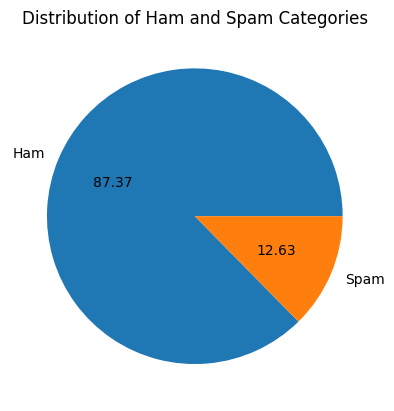

In [ ]:
#Plotting visualization for better visuals purposes
plt.pie(df["Category"].value_counts(), autopct = "%.2f", labels=['Ham','Spam'])
plt.title("Distribution of Ham and Spam Categories")
plt.show()

In [ ]:
#Seperating the data from columns as X and Y
x = data['Message']
y = data['Category']

In [ ]:
#Checking data from both Variables
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: Message, dtype: object

In [ ]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Category, dtype: object

In [ ]:
#Splitting the data as Training and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [ ]:
#Checking the Shape of Training and Testing sets for x
print(x.shape)
print(X_train.shape)
print(X_test.shape)

(5169,)
(4135,)
(1034,)


In [ ]:
#Checking the Shape of Training and Testing sets for y
print(y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5169,)
(4135,)
(1034,)


In [ ]:
# Using TF-IDF vectorizer to convert text messages into numerical features
conv = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [ ]:
# Converting the Training and Testing Text messages into numerical features using TF-IDF
X_train_conv = conv.fit_transform(X_train)
X_test_conv = conv.transform(X_test)

In [ ]:
# Convert the Category values to integers (0 and 1) from Object Type
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [ ]:
#Creating Logistic Regression model and Training in using Training data
model = LogisticRegression()
model.fit(X_train_conv, Y_train)

LogisticRegression()

In [ ]:
#Making Predections and Calculating Accuracy of the Training Data
prediction = model.predict(X_train_conv)
accuracy = accuracy_score(Y_train, prediction)

In [ ]:
#Checking Accuracy of Training Data
print('The accuracy of Training Data is: ',accuracy)

The accuracy of Training Data is:  0.962273276904474


In [ ]:
#Insert you email message here for testing
message = input("Enter your email message here: ")

Enter your email message here: Congrats! You have won a free tomato. click here to claim your rewads


In [ ]:
#Checking the Email Message
email = [message]
conv_email = conv.transform(email)
prediction = model.predict(conv_email)
print(email)
#Printing the Prediction results
if (prediction)[0] == 1:
  print("This is a Ham Mail")
else:
  print("This is a Spam Mail")

['Congrats! You have won a free tomato. click here to claim your rewads']
This is a Spam Mail
